In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import re

In [3]:
data = pd.read_csv('operations.csv', encoding='utf-8', na_values=["", np.nan])

In [5]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [7]:
data.shape

(309, 5)

In [9]:
data.describe()

,montant,solde_avt_ope
count,307.000000,309.000000
mean,-45.911889,3396.117799
std,874.240605,666.180280
min,-15000.000000,1416.810000
25%,-20.495000,3010.760000
50%,-9.600000,3453.960000
75%,-2.710000,3783.860000
max,1071.600000,4709.310000


In [10]:
data['date_operation'] = pd.to_datetime(data['date_operation'])

In [12]:
data.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

In [13]:
data.isnull().sum()

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64

In [16]:
data_na = data.loc[data['montant'].isnull()]

for index in data_na.index:
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']

In [17]:
data.loc[data['categ'].isnull()]

,date_operation,libelle,montant,solde_avt_ope,categ
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN


In [18]:
data.loc[data['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX']

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


In [19]:
data.loc[data['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'

In [20]:
data[data.duplicated()]

,date_operation,libelle,montant,solde_avt_ope,categ
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


In [28]:
data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)

In [23]:
data.describe()

,date_operation,montant,solde_avt_ope
count,308,308.000000,308.000000
mean,2023-07-05 10:59:13.246753280,-45.782013,3395.301071
min,2023-03-31 00:00:00,-15000.000000,1416.810000
25%,2023-05-21 06:00:00,-20.447500,3010.737500
50%,2023-07-05 12:00:00,-9.600000,3452.465000
75%,2023-08-21 00:00:00,-2.715000,3787.232500
max,2023-10-06 00:00:00,1071.600000,4709.310000
std,NaN,872.818105,667.109412


In [24]:
i = data.loc[data['montant']==-15000].index[0]

In [ ]:
data.iloc[i-1:i+2,:]

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [29]:
data.loc[data['montant']==-15000, 'montant'] = -14.39 #la somme provient du calcul des soldes

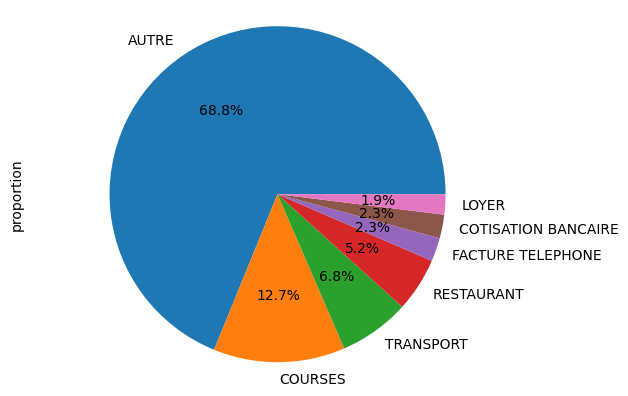

In [36]:
data.categ.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()

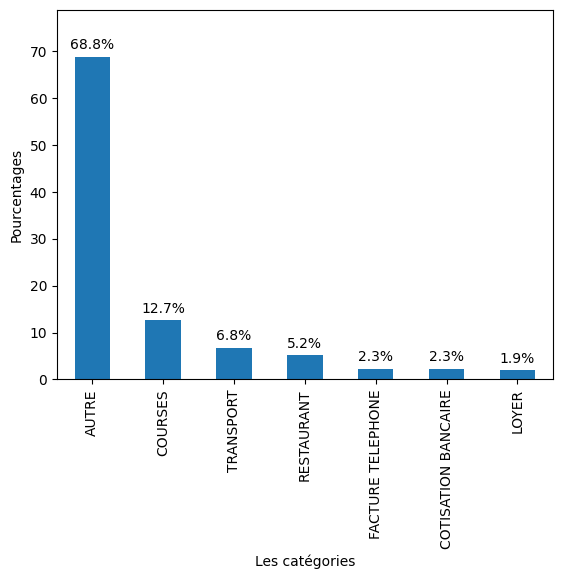

In [47]:
counts = data.categ.value_counts(normalize=True) * 100
ax = counts.plot(kind='bar')
for i, v in enumerate(counts):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')
plt.xlabel('Les catégories')
plt.ylabel('Pourcentages')
plt.ylim(0, max(counts) + 10)
plt.show()

In [52]:
data['quart_mois'] = [int((jour - 1)*4/31)+1 for jour in data['date_operation'].dt.day]

<Axes: xlabel='quart_mois'>

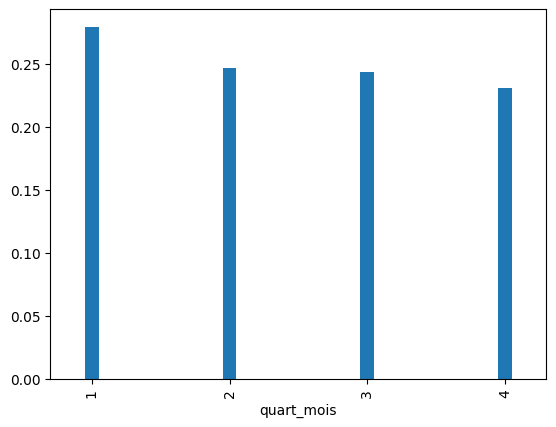

In [57]:
data.quart_mois.value_counts(normalize=True).plot(kind='bar', width=0.1)

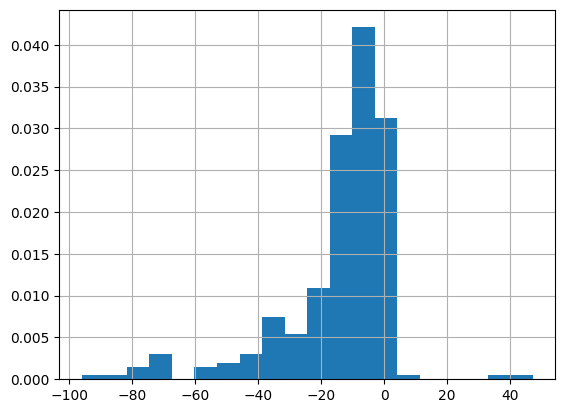

In [59]:
data[data.montant.abs() < 100].montant.hist(density=True, bins=20)
plt.show()